<a href="https://colab.research.google.com/github/JinMizar/ds3001_final_project/blob/main/pre_analysis_plan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/JinMizar/ds3001_final_project.git

fatal: destination path 'ds3001_final_project' already exists and is not an empty directory.


# Pre-Analysis Plan: DS3001 Final Project
**Team Members**: Jinhong Zhao, Tong Zhou, Hanna Svenson

---

## Overview
The pre-analysis plan outlines the procedure for exploring which chemical properties most influence the quality of Portuguese red wine. The investigation centers on the question: *Which chemical properties are most predictive of the quality of Portuguese red wine?*


## Observations
Each observation is a sample of Portuguese red wine, including 11 chemical properties and a sensory evaluation-based quality rating from 1 to 10. Kaggle provided a clean and full dataset. It has detail chemistry measures that were gathered in a lab along with quality scores that were based on expert tasters' assessments.With these variables, this project aims to predict wine quality, providing valuable insights to consumers looking to make better purchasing decisions and to wine producers looking to improve their production processes.

## Analysis Framework
The analysis will be a supervised learning classification task. Although wine quality is rated on a scale of 1-10, an examination of the dataset shows that the assigned ranks for samples only range from 3 to 8, with significantly more wines rated in the mid-range values of 5 and 6. To address this imbalance, we will create custom categories for the wine rankings:
  - **Low** (ratings 3-4)
  - **Medium** (ratings 5-6)
  - **High** (ratings 7-8)

This approach will provide more model stability, as fewer classes will provide more samples per class, making the model less sensitive to small variations within each category. This interpretation will still align well with the needs of producers and consumers, who would likely be interested in the general quality (low, medium, high) rather than specific distinctions between close ratings.

(array([  6.,  33., 483., 462., 143.,  16.]),
 array([3.        , 3.83333333, 4.66666667, 5.5       , 6.33333333,
        7.16666667, 8.        ]),
 <BarContainer object of 6 artists>)

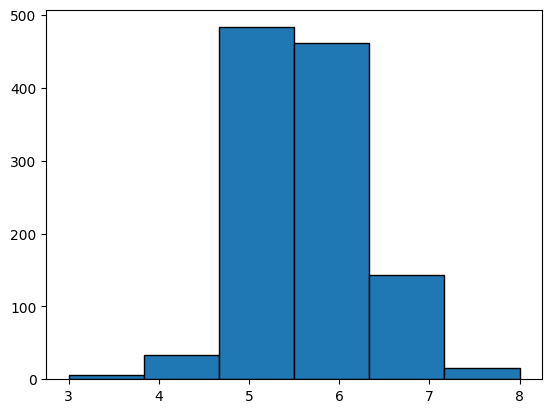

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

df = pd.read_csv('ds3001_final_project/data/WineQT.csv',low_memory=False)

plt.hist(df['quality'], bins=6, edgecolor='black')

quality_category
medium    945
high      159
low        39
Name: count, dtype: int64


(array([945., 159.,  39.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

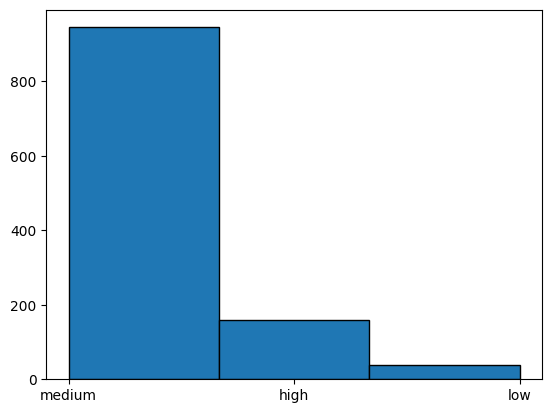

In [ ]:
def categorize_quality(rating):
    if rating in [3, 4]:
        return 'low'
    elif rating in [5, 6]:
        return 'medium'
    elif rating in [7, 8]:
        return 'high'


df['quality_category'] = df['quality'].apply(categorize_quality)
print(df['quality_category'].value_counts())
plt.hist(df['quality_category'], bins=3, edgecolor='black')

## Data Preparation: Addressing Imbalanced Classes

There is just a little amount of data cleaning that has to be done since the dataset that was collected from Kaggle, which is already clean and thorough. The main focus will be placed on the process of preparing the data for modeling. This will be performed by generating specific quality categories and rectifying any potential class imbalances that may be present.

Since the majority of data focuses on the 'median' category, classifying numerical output into three groups may not fully address the problem. Therefore, we aim to ensure that there are enough samples in each category in order to prevent the model from being biased toward the 'median' class. **Oversampling** serves as a practical approach to fulfilling expectations by duplicating existing samples in minority classes to boost their numbers. In this project, we do not consider undersampling the majority class due to the limited sample sizes.

945
quality_category
high      945
medium    945
low       945
Name: count, dtype: int64


(array([945., 945., 945.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

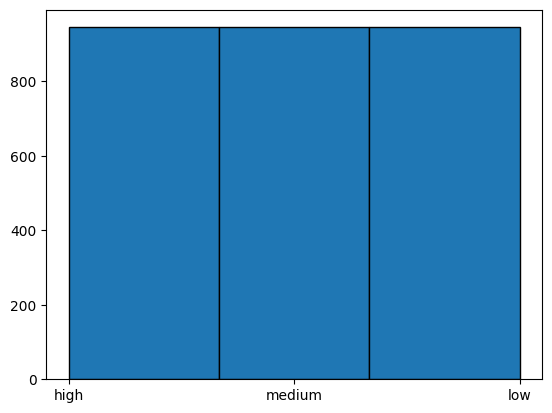

In [ ]:
low_class = df.loc[df['quality_category'] == 'low']
medium_class = df.loc[df['quality_category'] == 'medium']
high_class = df.loc[df['quality_category'] == 'high']

med_size = len(medium_class)
print(med_size)
low_class_oversampled = resample(low_class, replace=True, n_samples=med_size, random_state=42)
high_class_oversampled = resample(high_class, replace=True, n_samples=med_size, random_state=42)

df_oversampled = pd.concat([low_class_oversampled, medium_class, high_class_oversampled])
df_oversampled = df_oversampled.sample(frac=1, random_state=42)

print(df_oversampled['quality_category'].value_counts())
plt.hist(df_oversampled['quality_category'], bins=3, edgecolor='black')

## Potential Challenges and Solution
We anticipate several challenges in the analysis:
1. The imbalanced distribution of wine quality ratings, which could lead to the model over-predicting medium-quality wines if not addressed.
2. Multicollinearity among the wine properties, which could interfere with model performance.
3. Small sample sizes, which could reduce model stability.

If any of these problem come up in the future, to make sure the evaluation is strong and to avoid problems, we will use PCA to help reduce the dimensionality of the dataset by focusing on the most significant components, which is particularly useful since we only have a small amount of data to work with. We will use Lasso regression to fix the problem of multicollinearity between the wine qualities. This method punishes big coefficients and makes the model more stable. We will keep using oversampling techniques to fix the uneven distribution of wine quality scores and make the model better at predicting across all categories.

Some things that could be learned if the method doesn't work are what features aren't helping the model do its job, whether there are problems with the model selection or the way the data is represented, and how to improve data collection for future work.

If the approach fails to accurately predict wine quality, several insights could still be gained. First, it may indicate that the chosen chemical properties do not have a strong predictive relationship with wine quality ratings. This could encourage future exploration with non-chemical properties, such as grape variety, vineyard location, winemaking techniques, or aging process. Additionally, failure could reveal limitations due to the dataset's size or imbalance, highlighting the need for a larger and more representative dataset for future analyses.

## Success Analysis

The success of the analysis will be determined by the F1 score and a confusion matrix. The F1 score will provide a balanced view of the model's performance across classes, especially in distinguishing the rarer categories of high- and low-quality wines. An F1 score above 0.8 might mean the model performs well. The confusion matrix will help identify specific misclassification patterns, such as whether low-quality wines are mistakenly classified as high-quality or if wines tend to be misclassified into their neighbor quality group. This will offer deeper insight into the model’s ability to differentiate among quality levels accurately.

## Multicollinearity Analysis
The heatmap indicates that certain variables demonstrate a positive correlation with one another. This includes density and fixed acidity, which have a correlation of 0.68; citric acid and fixed acidity, with a correlation of 0.67; and total sulfur dioxide and free sulfur dioxide, showing a correlation of 0.66. Conversely, some variables exhibit a negative correlation, such as pH and fixed acidity, with a correlation of -0.69; pH and citric acid, which have a correlation of -0.55; and citric acid and volatile acidity, with a correlation of -0.54. In future analyses, it will be essential to examine the potential multicollinearity among these variables. We consider using Lasso regression in the later analysis to minimize the impact of correlated variables.

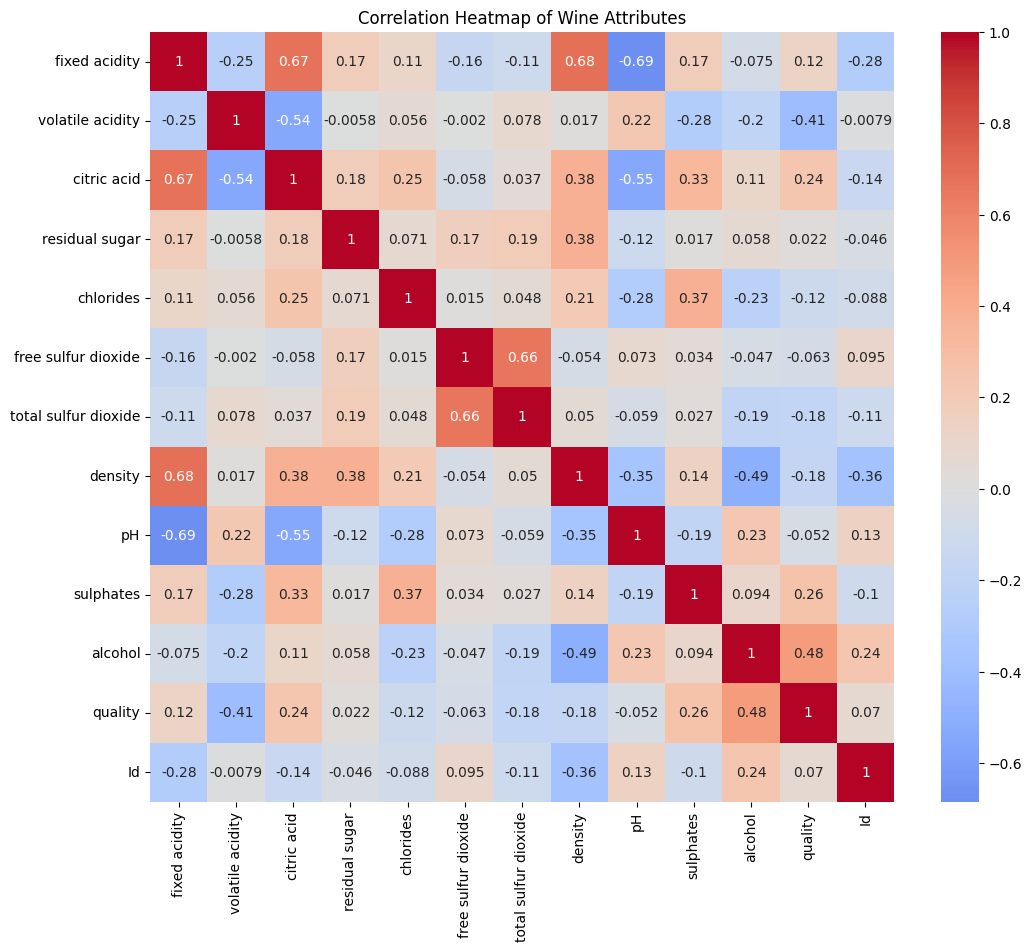

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Wine Attributes")
plt.show()

Although principal component analysis (PCA) is best used to big or complex datasets, it may still be useful for our dataset due to the high number of linked variables that might affect the reliability and accuracy of the model. Reducing the amount of features may also help avoid overfitting or make the model easier to understand.

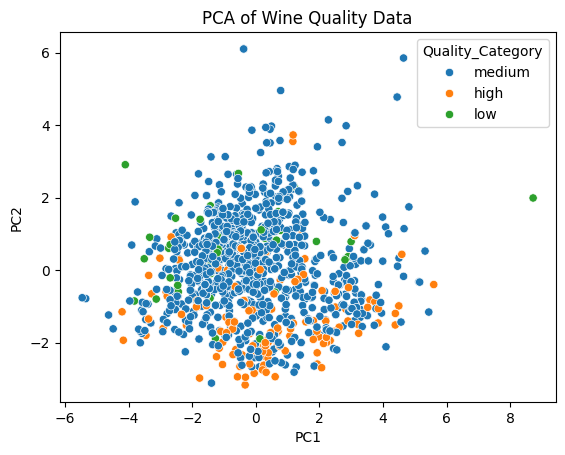

In [ ]:
# Possible ways to handle small sample sizes
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['quality', 'quality_category'])
y = df['quality_category']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Quality_Category'] = y

# Visualize the first two principal components
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', hue='Quality_Category', data=pca_df)
plt.title('PCA of Wine Quality Data')
plt.show()


'Medium' and 'high' categories, in particular, have substantial overlap in the plot, which does show some structure. This indicates that while PCA is useful for data visualization, improved categorization or feature representation may need more components or alternative methods of analysis.